In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [3]:
digits = datasets.load_digits()

In [4]:
clf = svm.SVC(gamma=0.0001, C=100)

In [5]:
print(len(digits.data))

1797


In [6]:
X,y = digits.data, digits.target

In [12]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
a= clf.predict(digits.data[[-6]])

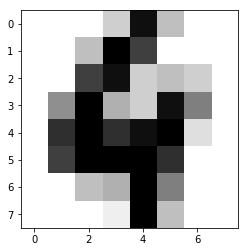

In [8]:
plt.imshow(digits.images[-6], cmap=plt.cm.gray_r, interpolation = "nearest")
plt.show()

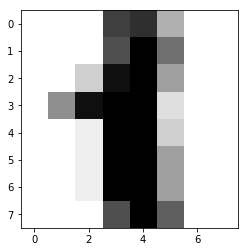

In [10]:
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation = "nearest")
plt.show()

In [13]:
a= clf.predict(digits.data[[1]])

In [14]:
print("predict:", a)

predict: [1]


In [67]:
b= clf.predict(digits.data[[-6]])+clf.predict(digits.data[[-1]])
print(b)

[12]


In [7]:
import pandas as pd
import numpy as np
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 33997 images
Image examples: 
-_100371.jpg


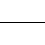

-_100382.jpg


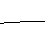

In [17]:
folder = "extracted_images/-"

onlyfilesm = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfilesm)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfilesm[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

Working with 25112 images
Image examples: 
+_10065.jpg


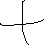

+_100651.jpg


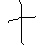

In [18]:
folder = "extracted_images/+"

onlyfilesp = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfilesp)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfilesp[i])
    display(_Imgdis(filename=folder + "/" + onlyfilesp[i], width=240, height=320))

In [25]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfilesm:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)
i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 120, 160))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

ValueError: invalid literal for int() with base 10: '-'